## Basic exploration and sample cleaning

In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/QUB/Data Mining/mobile phones.csv')
df.tail(5)

,date,tweet,retweets_count,likes_count
62558,15/05/2018,Realme 1 with 6-inch FHD+ display and Helio P6...,2,8
62559,15/05/2018,Oppo Realme 1 Smartphone With Dual 4G Support ...,1,7
62560,15/05/2018,"Realme 1 launched with Helio P60, Android Oreo...",0,1
62561,15/05/2018,"Realme 1 features a 6.0” FHD + Full screen, th...",105,143
62562,04/05/2013,I have 29 longboxes of comics in my mom's base...,0,0


Let´s read some ramdom comments to give an idea on the context.

In [ ]:
for i in (1,4,5,1000,1500,2000,3500,5000):
  print(df['tweet'][i])
  print('\n')

 Hi Ravinder, we would like to inform you that realme C11 2021 does not support clone app feature. Thanks for understanding. Further, if you have any query feel free to contact us again.


Need a phone and you're on a budget🤔 Get the  at any  supermarkets for only Ksh 9,490/-.  Offer valid toll 19th September.    


   Very pocket friendly  


You’re not going to believe how unbelievably priced the  is! 😱 Drumroll please 🥁  is priced at ₹22,990 so that you can . Pre-order now:    


 Maybe it has a gimbal like the Vivo X60 series :)


The South Korean tech giant  has launched the much-awaited budget smartphone Samsung Galaxy M12 in India. Check out all details here -      


Wrap your Apple: 13 of the best cases for the iPhone 13, Mini, Pro and Pro Max What fresh shell is this?    


Investigators say the seller handed over the Apple iPhone XR to the prospective buyer, who fled once it was in hand.  




Data set contains comments about different phones. As different currencies are mention (Kenyan Shilling, and Indian Rupee), it means we have different country markets.

Things to clean: emojis, double spaces, and upper letters.

In [ ]:
def basicexploration(dataset):
  print(">> Size of file in RAM (bytes): ", sys.getsizeof(df))

  print("\n\n>> DATA INFO");  dataset.info()

  print("\n\n>>", df.describe())

  print('\n\n>> PlOTS, CATEGORIES, AND RANGES')
  for i in dataset.columns:
    if dataset[i].dtype != 'object': # if numerical
      print(dataset[i].name, ' = (', min(dataset[i]), "-", max(dataset[i]), ')') #show range
      fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,2))
      fig.suptitle(i)
      axs[0].hist(dataset[[i]], bins=50) #plot frequency
      axs[0].set_title("Frequency")
      axs[1].boxplot(dataset[[i]], vert=False) #boxplot
      axs[1].set_title("Boxplot")
      plt.show()
      print("\n")

  print("\n\n>> PERCENTAGE MISSING VALUES BY COLUMN\n", dataset.isna().sum()/len(dataset)*100)

>> Size of file in RAM (bytes):  20432991


>> DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62563 entries, 0 to 62562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            62563 non-null  object
 1   tweet           62563 non-null  object
 2   retweets_count  62563 non-null  int64 
 3   likes_count     62563 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


>>        retweets_count   likes_count
count    62563.000000  62563.000000
mean        12.514362     70.302463
std        212.303082    618.372662
min          0.000000      0.000000
25%          0.000000      0.000000
50%          1.000000      3.000000
75%          4.000000     16.000000
max      27477.000000  54368.000000


>> PlOTS, CATEGORIES, AND RANGES
retweets_count  = ( 0 - 27477 )


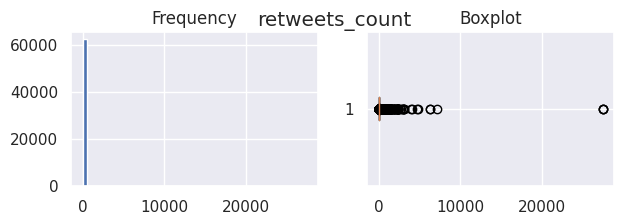



likes_count  = ( 0 - 54368 )


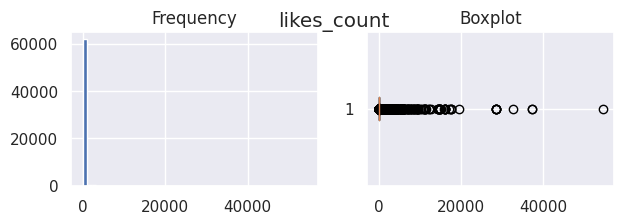





>> PERCENTAGE MISSING VALUES BY COLUMN
 date              0.0
tweet             0.0
retweets_count    0.0
likes_count       0.0
dtype: float64


In [ ]:
basicexploration(df)

Dataset conatins 4 columns and 62563 observations, each one is a comment. There are no missing values.

Most of the tweets have very low number of interactions (retweets and likes). Comments in the first quartile have no interactions at all. The second quartile have 1 retweet and 3 likes. The third quartile, 4 retweets and 16 likes. While the max values are 27477 retweets and 54368 likes.

Dates must be converted into date_times format.

In [ ]:
# Correct date format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df[['date']].tail()

,date
62558,2018-05-15
62559,2018-05-15
62560,2018-05-15
62561,2018-05-15
62562,2013-05-04


In [ ]:
def exploretweet(data):
  #Pearson correlation
  print("\n>> Pearson correlation likes vs Retweets: %0.3f  "% data[['likes_count','retweets_count']].corr().values[1][0])

  # Scatter plot likes vs retweets
  print("\n>> Distribution Plot:")
  plt.figure(figsize=(4,4))
  plt.scatter(data['retweets_count'], data['likes_count'],
              c ="pink", linewidths = 2, edgecolor ="green")
  plt.xlabel("retweets_count")
  plt.ylabel("likes_count")
  plt.show()

  #the most retweeted
  print("\n>> Most retweeted:",
        data.loc[data['retweets_count'] == max(data['retweets_count'])][['tweet']].values[0][0])
  # the most liked
  print("\n>> Most liked:",
        data.loc[data['likes_count'] == max(data['likes_count'])][['tweet']].values[0][0])

  # Dates range
  print("\n>> Dates from", min(data['date']).strftime('%Y-%m-%d'), "to", max(data['date']).strftime('%Y-%m-%d'))


>> Pearson correlation likes vs Retweets: 0.478  

>> Distribution Plot:


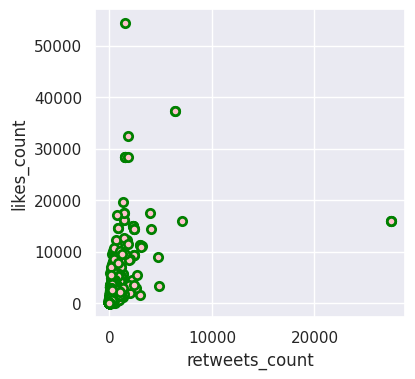


>> Most retweeted: 🎄🎁 GIVEAWAY 24 of 25 🎁🎄  Apple iPhone 12 Pro Max (Pacific Blue)  To enter: - Retweet ♻️ - Follow ✅  Good luck!  🔔 Don't forget to turn on post notifications so you don't miss future giveaways! 🔔  

>> Most liked: I hate when my iPhone 11 Pro Max dies and I can’t unlock my Tesla Model X P100D to get my 100% charged Apple AirPods Pro, unlucky 😒

>> Dates from 2010-01-13 to 2021-11-09


In [ ]:
exploretweet(df)

Apparently, there is no significant lineal asociation between number of retweets and likes.

The plot shows there is a positive association in some grade, but extreme values are distorsing the correlation coefficient. The plot also shows that most of obsevations are below the 20000 likes and 5000 retweets.

We can see that the most retweeted comment is result of a marketing campaing. It is not a natural manisfestetion about the sentiment for the product. These kinds of comments can distort the sentimental analysis, and the extreme values affect models. So, I will keep the analisis to the comments with likes and retweets below 20000 and 5000, respectively.

Now, let's explore dates.

In [ ]:
#define function
def groupy(dataset, figsize, title):
  #Groupby
  group = df.groupby(dataset).aggregate({'tweet':['count'], 'likes_count':['mean'], 'retweets_count':['mean']}).sort_index()
  group.columns = ['tweet_count', 'Av_likes', 'Av_retweets']
  print(group)

  #plot
  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(111)

  lns1 = ax.plot(group['tweet_count'], linestyle = '-', color='tab:blue', label='tweet_count')
  ax2 = ax.twinx()
  lns2 = ax2.plot(group['Av_likes'], linestyle = '--', color='tab:red', label='Av_likes')
  lns3 = ax2.plot(group['Av_retweets'], linestyle = ':', color='tab:green', label='Av_retweets')

  lns = lns1+lns2+lns3
  labs = [l.get_label() for l in lns]
  ax.legend(lns, labs, loc=0)

  ax.set_ylabel('tweet_count', color='tab:blue')
  ax.tick_params(axis='y', labelcolor='tab:blue')
  ax2.set_ylabel('Ave. likes & retweets')
  fig.tight_layout()
  plt.title(title)
  plt.show()

Plot structure from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

      tweet_count   Av_likes  Av_retweets
date                                     
2010           64   0.468750     1.625000
2011           85   1.788235     3.564706
2012          134   1.343284     7.335821
2013          174   2.390805     9.126437
2014          144   1.479167     3.472222
2015          249   9.381526     9.642570
2016         4182  13.191296     9.737924
2017          837  25.058542    10.010753
2018         3629  33.354092     9.264260
2019        10066  58.022253     9.916451
2020        21498  87.458647    15.879384
2021        21501  80.628157    11.773406


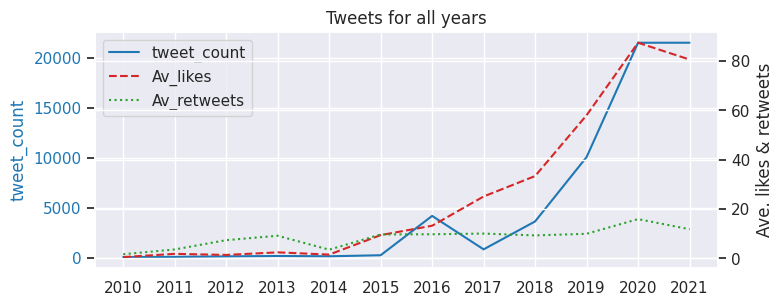

In [ ]:
# Yearly analysis
groupy(df['date'].dt.strftime('%Y'), figsize=(10,2), title='Tweets for all years')

The table and plot show that only years 2019, 2020 and 2021 have count of tweets over 10000. All the previus years have very little tweets. Looking to keep nomal distribution among fuitures for following forecast analysis, I will work only with only these three years.

In [ ]:
# Add two new features to the table
df['Year'] = df['date'].dt.strftime('%Y')
df['month'] = df['date'].dt.strftime('%m')
df['day'] = df['date'].dt.strftime('%d')
df[["Year", "month", "day"]] = df[["Year", "month", "day"]].apply(pd.to_numeric) #convert year and day columns to numerics
df.tail()

,date,tweet,retweets_count,likes_count,Year,month,day
62558,2018-05-15,Realme 1 with 6-inch FHD+ display and Helio P6...,2,8,2018,5,15
62559,2018-05-15,Oppo Realme 1 Smartphone With Dual 4G Support ...,1,7,2018,5,15
62560,2018-05-15,"Realme 1 launched with Helio P60, Android Oreo...",0,1,2018,5,15
62561,2018-05-15,"Realme 1 features a 6.0” FHD + Full screen, th...",105,143,2018,5,15
62562,2013-05-04,I have 29 longboxes of comics in my mom's base...,0,0,2013,5,4


>> Percentage of samples from original datset: 84.798  

>> Pearson correlation likes vs Retweets: 0.756  

>> Distribution Plot:


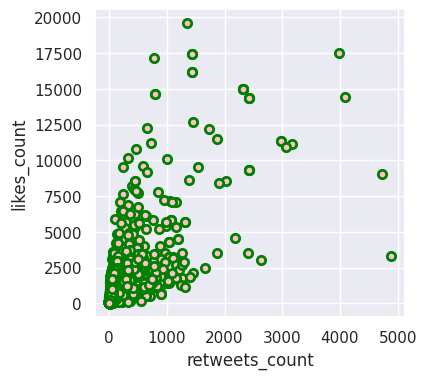


>> Most retweeted: Make sure your name is the draw tomorrow - we have an Apple iPhone 11 64GB and a JBL Flip 5 Bluetooth Speaker up for grabs!    

>> Most liked: Is this just a coincidence that I wore this dress on the same day as Apple iPhone 11’s launch   

>> Dates from 2019-01-01 to 2021-11-09


In [ ]:
# Subset samples with likes<=20000, retweets<=5000, and Year>=2019
df1 = df.loc[(df['likes_count'] <= 20000) & (df['retweets_count'] <= 5000) & (df['Year'] >= 2019)]

print('>> Percentage of samples from original datset: %0.3f  '% (100*len(df1)/len(df)))

exploretweet(df1)

The new data set conatins about 85% of the original samples. The plot shows that there are more isolated values, especialy in the retweets dimenssion. The most retweet coments does not reflect clearly a sentiment. Finally, the pearson coefficients increased significantly.

Let's drop more extreme values.

>> Percentage of samples from original datset: 84.737  

>> Pearson correlation likes vs Retweets: 0.706  

>> Distribution Plot:


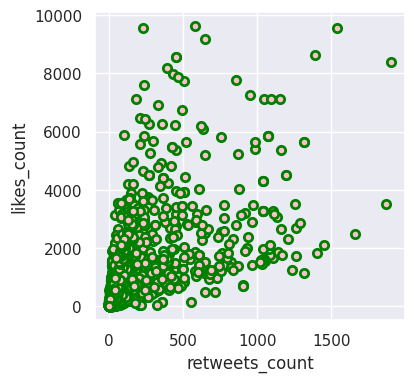


>> Most retweeted: The 'i' in iPhone 11 now stands for India-made: Apple shifts from China to India.   

>> Most liked: When it comes to you &amp; , perfection is a must! 😎  With a 6.43” Dual Punch-Hole Display, you get an extensive viewing playground &amp; a brilliant FHD+ Super  screen ensures you have an incredible time when you ! ✨ Buy now:    

>> Dates from 2019-01-01 to 2021-11-09


In [ ]:
df1 = df1.loc[(df['likes_count'] <= 10000) & (df1['retweets_count'] <= 2000)]

print('>> Percentage of samples from original datset: %0.3f  '% (100*len(df1)/len(df)))

exploretweet(df1)

>> Percentage of samples from original datset: 84.443  

>> Pearson correlation likes vs Retweets: 0.728  

>> Distribution Plot:


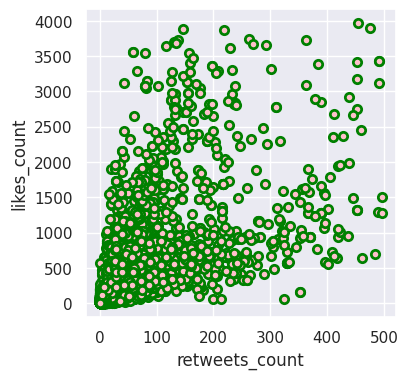


>> Most retweeted: Apple is removing the charger and headphones from the iPhone 12 box, to cut down on its carbon footprint.     

>> Most liked: Apple leaker says he'll 'shave off his eyebrows' if iPhone 12 is unveiled today    

>> Dates from 2019-01-01 to 2021-11-09


In [ ]:
df1 = df1.loc[(df['likes_count'] <= 4000) & (df1['retweets_count'] <= 500)]

print('>> Percentage of samples from original datset: %0.3f  '% (100*len(df1)/len(df)))

exploretweet(df1)

In the last two subetings, we can see that there is not significant change in relative number of samples and the pearson coeficcient. So we can stop removing extremevalues. The most retweeted comment of df3 reflects clearly a sentiment, so it is usefull for the folowing analysis.

            tweet_count   Av_likes  Av_retweets
date                                           
2019-01-01            2   3.000000     0.500000
2019-01-02           11   5.454545     2.090909
2019-01-03            9   9.777778     1.666667
2019-01-04            6   4.333333     1.500000
2019-01-05            6  28.000000     9.500000
...                 ...        ...          ...
2021-11-05           28  16.857143     3.035714
2021-11-06           22  14.545455     4.409091
2021-11-07           22  31.318182     6.227273
2021-11-08           29  46.724138     4.827586
2021-11-09            6   0.166667     0.333333

[1043 rows x 3 columns]


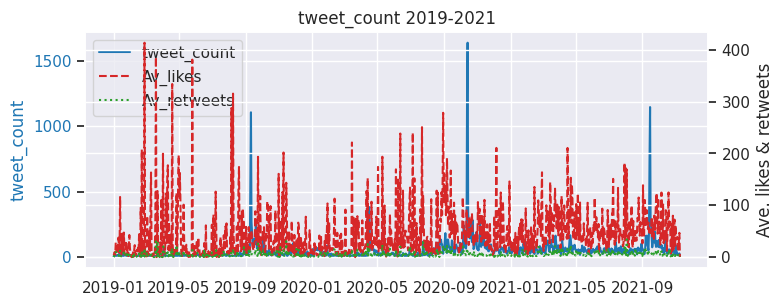

In [ ]:
# dates analysis
groupy(df1['date'], figsize=(10,2), title='tweet_count 2019-2021')

Despite the plot is bulky. It seems that tweet_count behavour is periodical. So let's analyse it monthly and daily.

       tweet_count   Av_likes  Av_retweets
month                                     
1.0           3363  25.971751     3.570919
2.0           2161  38.418788     4.715410
3.0           3129  65.398210     6.966443
4.0           4304  62.722584     9.493262
5.0           2629  42.028908     4.836820
6.0           2415  48.465010     7.154865
7.0           2934  49.131561     6.517382
8.0           3904  57.835553     7.308145
9.0          11642  56.652293     8.102216
10.0          9813  52.695098     8.109141
11.0          4029  44.789278     3.953835
12.0          2507  42.534105     3.684882


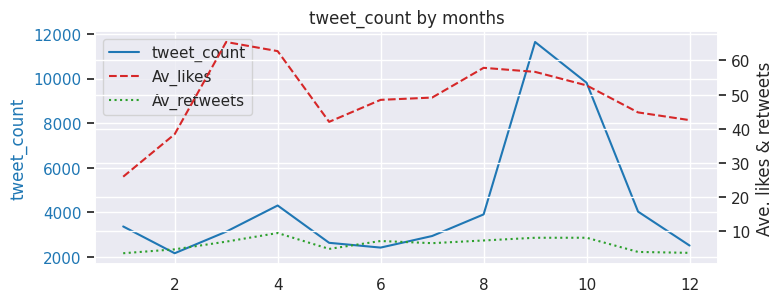

In [ ]:
# monthly analysis
groupy(df1['month'], figsize=(10,2), title='tweet_count by months')


      tweet_count   Av_likes  Av_retweets
day                                      
1.0          1188  50.154882     5.977273
2.0          1362  55.050661     6.497797
3.0          1298  54.615562     7.714946
4.0          1442  42.113731     4.762136
5.0          1199  60.834862     6.593828
6.0          1571  55.399109     7.042011
7.0          1599  45.781739     5.627892
8.0          1471  56.420122     6.989803
9.0          1453  58.029594     6.665520
10.0         2029  52.586496     8.061607
11.0         2356  42.534380     7.369270
12.0         1444  50.635734     6.070637
13.0         2882  52.918459     9.981957
14.0         3612  48.356312     8.061739
15.0         3127  54.740966     7.608890
16.0         2221  45.266096     6.100855
17.0         1705  47.547214     5.062170
18.0         1463  47.077239     5.684894
19.0         1442  55.375173     6.131068
20.0         1907  52.297326     6.985317
21.0         1674  45.692354     6.238949
22.0         1481  55.662390     7

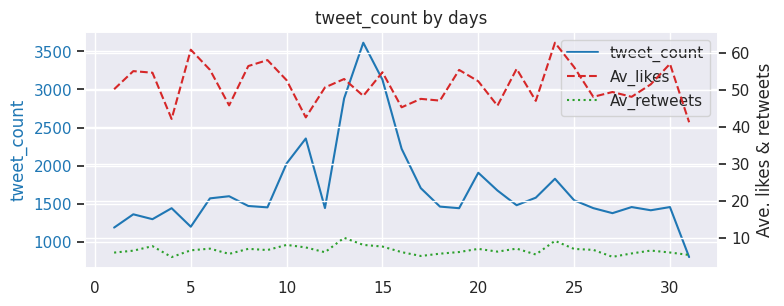

In [ ]:
# daily analysis
groupy(df1['day'], figsize=(10,2), title='tweet_count by days')

From the previous plots, the amount of tweets have picks in September and October are the pick each year; same for middle days in each month. Average of likes and retweets do not seem to have picks either montly or daily.

## Text Cleaning

Cleaning steps from
https://monkeylearn.com/blog/text-cleaning/
and funtion structure from https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python

In [ ]:
#setup packages and libraries
!pip install textblob
!pip install tweepy
!pip install emoji==1.7

import re
import emoji
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('words')
words = set(nltk.corpus.words.words())

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# define cleaner function
def cleaner(tweet):
  tweet = tweet.lower() #Normalize to lowercase
  tweet = emoji.demojize(tweet) #Emojis to text
  tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
  tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet) #Remove special characters and punctuation marks
  tweet = re.sub(r'\b\w{1,3}\b', '', tweet) #remove words with 3 or less characters
  tweet = " ".join((word for word in tweet.split() if word not in (stop))) #remove stop-words
  tweet = " ".join(map(lambda x: WordNetLemmatizer().lemmatize(x), nltk.wordpunct_tokenize(tweet))) #Stemming: reduce words based on root stem
  #tweet = " ".join(map(lambda x: PorterStemmer().stem(x), nltk.wordpunct_tokenize(tweet))) #Lemmatization: reduce words based on root definition. I did not aplly this one coze its changes many words in a wird way
  return tweet

In [ ]:
# compare cleaning on some tweets
for i in (0,4,6,10):
  print(">>Original: " + df1['tweet'][i] + "\n" + ">>Cleaned: " + cleaner(df1['tweet'][i]) + "\n" )

>>Original:  Sorry for the experience. We'll surely help you out. Could you please confirm if you're referring to the product 'realme C11 2021 (Cool Blue, 64 GB)' so that we can look into it and assist you accordingly?  Awaiting your response. (1/2)
>>Cleaned: sorry experience surely help could please confirm referring product realme 2021 cool blue look assist accordingly awaiting response

>>Original: Need a phone and you're on a budget🤔 Get the  at any  supermarkets for only Ksh 9,490/-.  Offer valid toll 19th September.    
>>Cleaned: need phone budget thinking face supermarket offer valid toll 19th september

>>Original:   The best smartphone deal out here  
>>Cleaned: best smartphone deal

>>Original: Realme 8, Realme 8 5G, Realme C11 (2021), Realme C21, and Realme C25s price in India has been hiked. Here are the new prices:   
>>Cleaned: realme realme realme 2021 realme realme c25s price india hiked price



In [ ]:
# add new column to the dataframe
df1['clean_tweet'] = df1['tweet'].map(lambda x: cleaner(x)) #apply funtion to each tweet

In [ ]:
df1.head(3)

,date,tweet,retweets_count,likes_count,Year,month,day,clean_tweet
0,2021-10-31,Sorry for the experience. We'll surely help y...,0,0,2021,10,31,sorry experience surely help could please conf...
1,2021-10-23,"Hi Ravinder, we would like to inform you that...",0,0,2021,10,23,ravinder would like inform realme 2021 support...
2,2021-10-13,"However, the product realme C11 2021 (Cool Bl...",0,0,2021,10,13,however product realme 2021 cool blue delivere...


In [ ]:
# Let's check if there are any of the tweets has images

# Define a regular expression pattern to search for image URLs
img_pattern = re.compile(r'\bhttps?://\S+\.(png|jpe?g|gif)\b')

# Create a new column with 1 if the tweet has an image, 0 if not
df1['tweet'].apply(lambda x: 1 if img_pattern.search(x) else 0).value_counts()

0    52830
Name: tweet, dtype: int64

There are no images in this dataset.

## Sentiment Analysis

Guide from:

*    https://medium.com/@nikitasilaparasetty/twitter-sentiment-analysis-for-data-science-using-python-in-2022-6d5e43f6fa6e
*   https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/





In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
!pip install better-profanity
from better_profanity import profanity
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Sentiment scores

In [ ]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df1['clean_tweet']]

# Add sentiment scores as new column
df1['sentiment_score'] = [tweet.sentiment.polarity for tweet in sentiment_objects]
df1.head(3)

,date,tweet,retweets_count,likes_count,Year,month,day,clean_tweet,sentiment_score
0,2021-10-31,Sorry for the experience. We'll surely help y...,0,0,2021,10,31,sorry experience surely help could please conf...,0.0875
1,2021-10-23,"Hi Ravinder, we would like to inform you that...",0,0,2021,10,23,ravinder would like inform realme 2021 support...,0.3000
2,2021-10-13,"However, the product realme C11 2021 (Cool Bl...",0,0,2021,10,13,however product realme 2021 cool blue delivere...,0.1700


Let's see the top 5 commentns for the most positive and negative sentiment.

In [ ]:
df1.sort_values(by='sentiment_score', inplace=True) # sort dataframe by the column values

print(">> Most negative sentiment \n", df1['tweet'].values[0:5],
      "\n\n",
      ">> Most positive sentiment \n", df1['tweet'].values[-6:-1])

>> Most negative sentiment 
 ['Apple’s newest iOS 15 beta fixes this horrible iPhone 13 bug    '
 '. iPhone 11 leak confirms some users worst fears.   '
 'Why the Apple Store is the worst place to buy your new iPhone 11  '
 'The camera looks insane on the iPhone 12 pro Max.  still the smartphone video king.         '
 '. iPhone 11 leak confirms some users worst fears.   '] 

 >> Most positive sentiment 
 ["The best phones of 2019. I said, what I said.   🔥 Apple's iPhone 11 🔥 Samsung's Galaxy Note 10 Plus 🔥 Huawei's P30 Pro 🔥 OnePlus' 7 Pro 🔥 Samsung's Galaxy S10E 🔥 Google's Pixel 3A 🔥 Motorola's Moto G7   "
 'The  award for the Best Camera Phone of 2020 was announced by  and ahead of the runner-up Samsung Galaxy Note 20 Ultra from , iPhone 12 Pro Max from  won the title.  '
 'Apple iPhone 12 Pro Max review: the best smartphone camera you can get    '
 "Apple's premium iPhone 12 Pro Max goes on sale Friday in Australia &amp; given it has the company's best cameras, we home in on computa


>> Pearson correlation likes vs Sentiment score: 0.005  


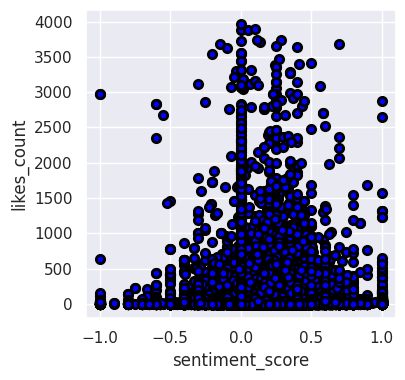

In [ ]:
print("\n>> Pearson correlation likes vs Sentiment score: %0.3f  "% df1[['likes_count','sentiment_score']].corr().values[1][0])

  # Scatter plot likes vs sentiment scores
plt.figure(figsize=(4,4))
plt.scatter(df1['sentiment_score'], df1['likes_count'],
            c ="blue", linewidths = 2, edgecolor ="black")
plt.xlabel("sentiment_score")
plt.ylabel("likes_count")
plt.show()

An important amount of tweets have sentimet scores of 0. While, there are more with positive values than negatives. Furthermore, there no correlation between the variables.

### WordCloud

In [ ]:
# Create wordCloud plot function
def wordCloud(dataset, title):
  text = " ".join(cat for cat in dataset['clean_tweet'])
  # Creating word_cloud with text as argument in .generate() method
  word_cloud = WordCloud(collocations = False, background_color = "white").generate(text)
  # Display the generated Word Cloud
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.show()

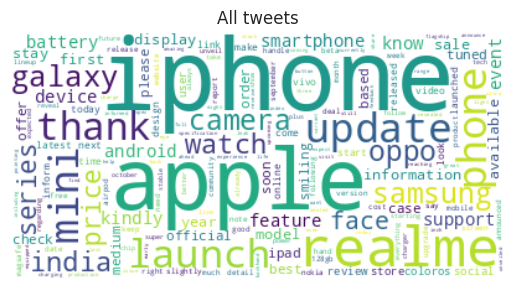

In [ ]:
# plot wordcloud
wordCloud(df1, title = 'All tweets')

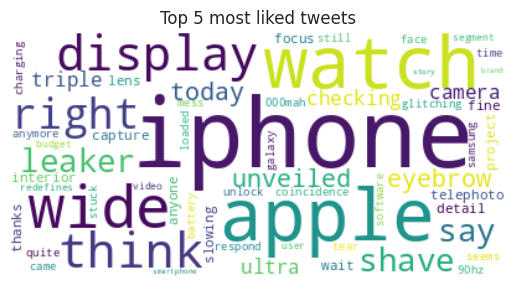


>> Top 5 liked tweets

Apple leaker says he'll 'shave off his eyebrows' if iPhone 12 is unveiled today    

Checking out the new iPhone 11 Pro, the triple camera from ultra wide to wide  and telephoto lens.  Thanks  can’t wait to focus and capture the fine details of my Interior Projects with it.  

Anyone else’s iPhone slowing down and glitching ever since the iPhone 12 came out?  seems like quite the coincidence

my iphone 13 doesn’t unlock with apple watch anymore   the display on my iphone 13 just doesn’t respond 10% of the time   and now my watch thinks it’s still charging and it’s stuck that way 😂  apple software is A MESS right now  

Right from a 90Hz display to a loaded 6,000mAh battery - the Samsung Galaxy M12 redefines the budget segment. Watch this video to see what users think about the smartphone! [Brand Story]      


In [ ]:
# Same for just top5 most liked tweets
top5liked = df1.sort_values(by=['likes_count'],ascending=False).head(5) # 5 most liked tweets

wordCloud(top5liked, "Top 5 most liked tweets")

print("\n>> Top 5 liked tweets")
for i in range(len(top5liked)):
  print("\n" + top5liked['tweet'].values[i])

In [ ]:
# show top 10 most repeated words in all the tweets
df1['clean_tweet'].str.split(expand=True).stack().value_counts()[:10]

iphone     45709
apple      34071
realme     10464
phone       4788
mini        4785
update      4676
launch      4481
galaxy      3949
samsung     3859
oppo        3844
dtype: int64

I add new four dummy features with the four phones (iphone, realme, galaxy, oppo) that appear in the prevous table. If the word is in the tweet then 1, 0 otherwise.

In [ ]:
#Add dummy columns for the most frequent phones
for i in ['iphone', 'realme', 'galaxy', 'oppo']:
  df1[i] = df1['clean_tweet'].apply(lambda x: i in x).astype(int)
df1.tail(3)

,date,tweet,retweets_count,likes_count,Year,month,day,clean_tweet,sentiment_score,iphone,realme,galaxy,oppo
62491,2019-01-17,"Episode 8 of “Realme Community FAQ” is here, g...",8,234,2019,1,17,episode realme community guy head query answered,0.0,0,1,0,0
62492,2019-01-17,I want to add a parallel perspective to this w...,0,3,2019,1,17,want parallel perspective come smartphone revi...,-0.2,1,1,0,0
62493,2019-01-09,The story of a SMS security code... One that ...,0,3,2019,1,9,story security code took minute arrive,0.0,0,0,0,0


## More features

In [ ]:
# new column with word count of clean tweets
df1['CleanWordCount'] = list(map(lambda x: len(x.split()), df1['clean_tweet']))
df1.head(1)

,date,tweet,retweets_count,likes_count,Year,month,day,clean_tweet,sentiment_score,iphone,realme,galaxy,oppo,CleanWordCount
0,2021-10-31,Sorry for the experience. We'll surely help y...,0,0,2021,10,31,sorry experience surely help could please conf...,0.0875,0,1,0,0,18


In [ ]:
# add dummy column. 1 if tweet has image, 0 if not

# Define a regular expression pattern to search for image URLs
img_pattern = re.compile(r'\bhttps?://\S+\.(png|jpe?g|gif)\b')

# Create a new column with 1 if the tweet has an image, 0 if not
df1['has_image'] = df1['tweet'].apply(lambda x: 1 if img_pattern.search(x) else 0)

df1['has_image'].value_counts()

0    52830
Name: has_image, dtype: int64

There are not any image, then drop the column as it is a constant.

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df1m = df1.drop(['date','tweet', 'retweets_count', 'Year', 'clean_tweet', 'has_image'], axis=1)
df1m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52830 entries, 0 to 62493
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   likes_count      52830 non-null  int64  
 1   month            52830 non-null  int64  
 2   day              52830 non-null  int64  
 3   sentiment_score  52830 non-null  float64
 4   iphone           52830 non-null  int64  
 5   realme           52830 non-null  int64  
 6   galaxy           52830 non-null  int64  
 7   oppo             52830 non-null  int64  
 8   CleanWordCount   52830 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.0 MB


In [ ]:
df1m.tail()

,likes_count,month,day,sentiment_score,iphone,realme,galaxy,oppo,CleanWordCount
62489,1,1,29,0.2,0,1,0,0,7
62490,110,1,17,0.0,0,1,0,0,13
62491,234,1,17,0.0,0,1,0,0,7
62492,3,1,17,-0.2,1,1,0,0,19
62493,3,1,9,0.0,0,0,0,0,6


In [ ]:
def modeli(dataset):
  def modeling(dataset, stimator):
    y = dataset['likes_count']
    X = dataset.drop('likes_count', axis=1)
    XTrain, Xtest, yTrain, ytest = train_test_split(X, y, test_size=0.2, random_state=32)

    model = Pipeline(steps=[('scaler', StandardScaler()),  #normalize with standard scaler (0,1)
                            ('log_reg', stimator) #set the stimator
                            ]).fit(XTrain,yTrain) #train model

    return(str(stimator) + " score: " + str(model.score(Xtest,ytest)) + '\n')

  print(modeling(dataset, stimator=LinearRegression()),
        modeling(dataset, Lasso(alpha=0.1)),
        modeling(dataset, RandomForestRegressor(max_depth=2, random_state=0)))

In [ ]:
modeli(df1m)

LinearRegression() score: 0.0063140819444768015
 Lasso(alpha=0.1) score: 0.006342065029737443
 RandomForestRegressor(max_depth=2, random_state=0) score: 0.004872589253606008



The three scores shows a very poor performance, with values close to 0. We can considere that likes_count mean is even as good predictor as the models.

Let's mutate months and days by dummy variables, where 1 if tweets was published in busy months/days, 0 if not.

In [ ]:
df1m['busy_month'] = df1m['month'].apply(lambda x: 1 if x in range(8,12) else 0)
df1m['busy_day'] = df1m['day'].apply(lambda x: 1 if x in range(14,17) else 0)
df2m = df1m.drop(['month','day'], axis=1) #drop original month and day columns
df2m.tail(3)

,likes_count,sentiment_score,iphone,realme,galaxy,oppo,CleanWordCount,busy_month,busy_day
62491,234,0.0,0,1,0,0,7,0,0
62492,3,-0.2,1,1,0,0,19,0,0
62493,3,0.0,0,0,0,0,6,0,0


In [ ]:
modeli(df2m)

LinearRegression() score: 0.006359791556898142
 Lasso(alpha=0.1) score: 0.006387801822455019
 RandomForestRegressor(max_depth=2, random_state=0) score: 0.004726008441144791



Results are essentially the same.